In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### As we can see that the 'total_bedrooms' variable has some null values and the number of the null values are small relative to the Dataset. So we can drop the null value rows

In [5]:
df.dropna(inplace= True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']

In [10]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [11]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [13]:
train_data  = X_train.join(y_train)

In [14]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
489,-122.25,37.86,48.0,2153.0,517.0,1656.0,459.0,3.0417,NEAR BAY,489600.0
2117,-119.73,36.76,30.0,1548.0,282.0,886.0,311.0,3.1000,INLAND,71300.0
18861,-122.19,38.13,5.0,7854.0,1446.0,4361.0,1395.0,4.9504,NEAR BAY,214800.0
6855,-118.15,34.06,28.0,3855.0,922.0,2517.0,874.0,3.5050,<1H OCEAN,204300.0
5321,-118.43,34.05,52.0,1693.0,290.0,727.0,305.0,6.7115,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,1484.0,295.0,928.0,295.0,5.1418,<1H OCEAN,190300.0
17455,-120.43,34.70,26.0,2353.0,389.0,1420.0,389.0,3.8700,NEAR OCEAN,125800.0
5249,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,<1H OCEAN,500001.0
12290,-116.97,33.94,29.0,3197.0,632.0,1722.0,603.0,3.0432,INLAND,91200.0


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16346 entries, 489 to 235
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16346 non-null  float64
 1   latitude            16346 non-null  float64
 2   housing_median_age  16346 non-null  float64
 3   total_rooms         16346 non-null  float64
 4   total_bedrooms      16346 non-null  float64
 5   population          16346 non-null  float64
 6   households          16346 non-null  float64
 7   median_income       16346 non-null  float64
 8   ocean_proximity     16346 non-null  object 
 9   median_house_value  16346 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [16]:
train_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,-119.569609,35.629776,28.619601,2644.293038,539.894408,1432.725743,501.621192,3.865075,207004.371895
std,2.001760,2.132851,12.589470,2213.919175,426.263180,1155.391117,387.455746,1.888763,115466.138596
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1449.000000,296.000000,790.000000,280.000000,2.566300,119200.000000
50%,-118.490000,34.260000,29.000000,2127.000000,434.000000,1168.000000,409.000000,3.534950,179800.000000
75%,-118.010000,37.710000,37.000000,3149.000000,649.000000,1724.750000,606.000000,4.742200,265800.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

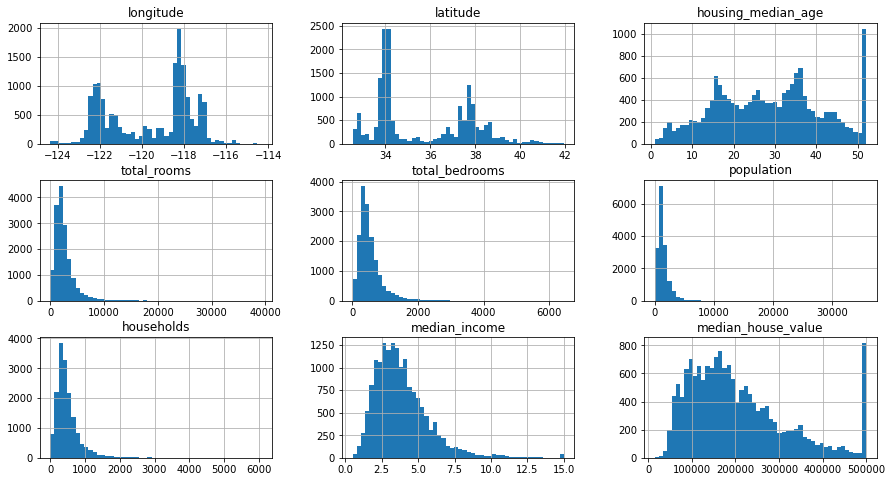

In [17]:
train_data.hist(figsize = (15, 8), bins = 50)

<AxesSubplot:>

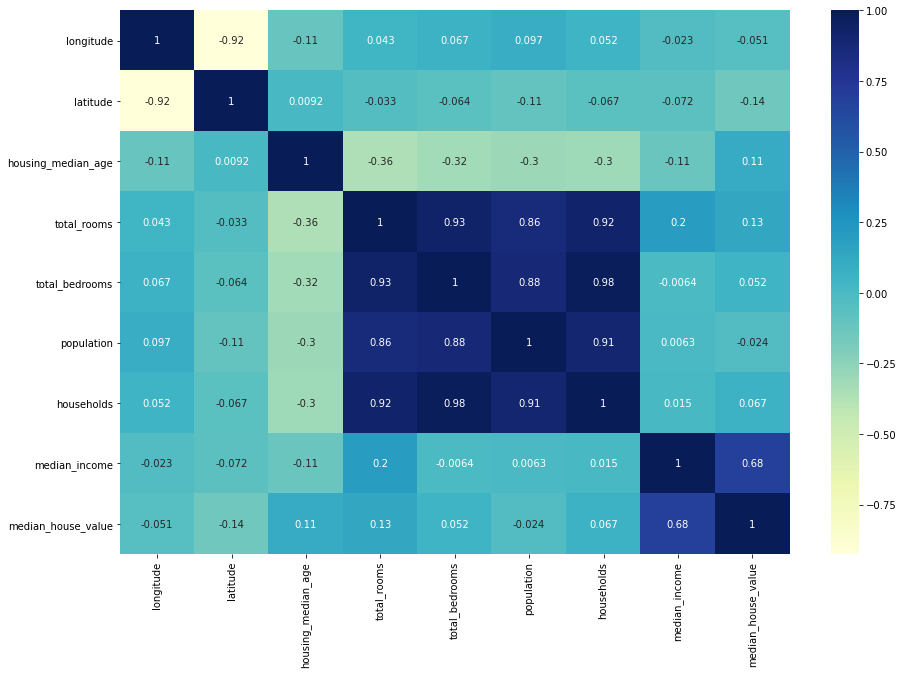

In [18]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(train_data.corr(),annot = True, cmap = 'YlGnBu' )

In [19]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

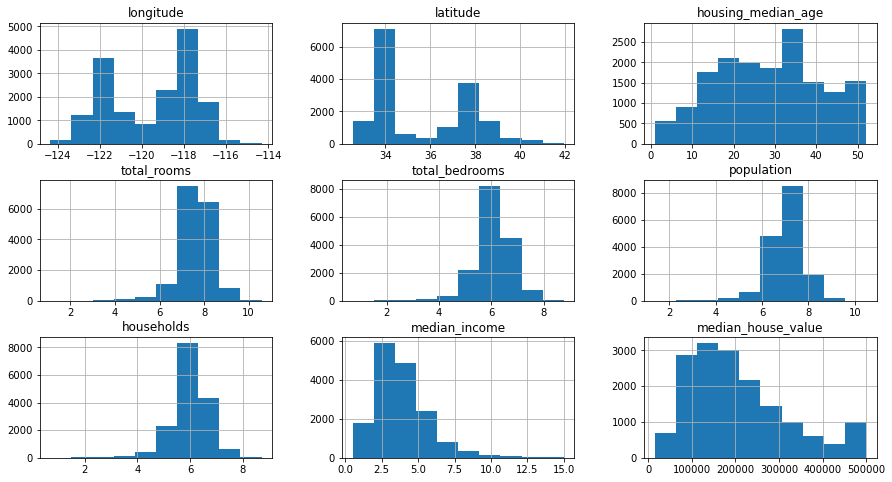

In [20]:
train_data.hist(figsize= (15, 8))

<AxesSubplot:>

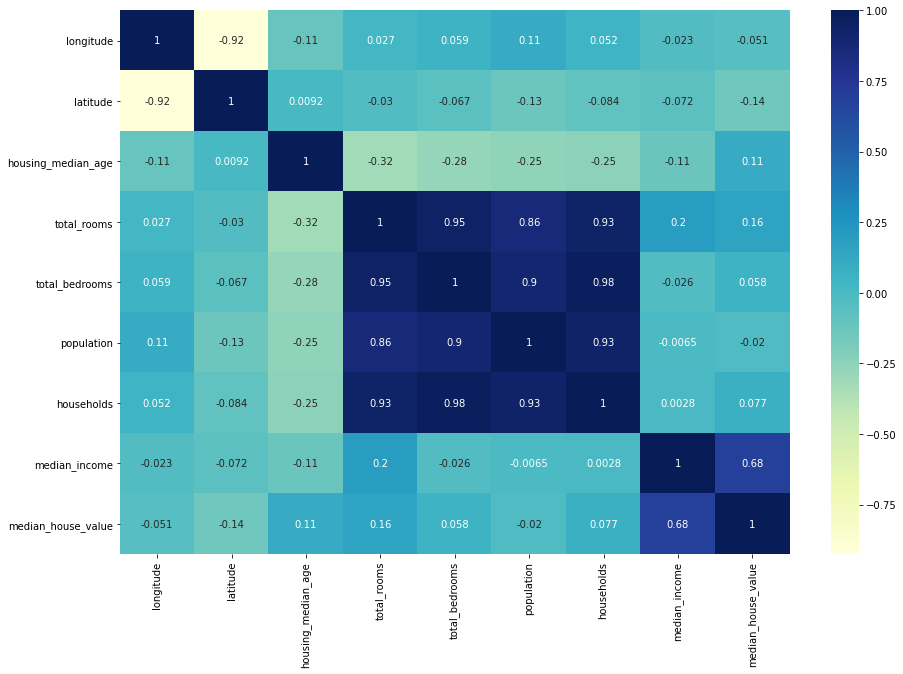

In [21]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(train_data.corr(),annot = True, cmap = 'YlGnBu')

### Here we can see that though some columns are in logarithmic scale, the correlation is not changed

In [22]:
train_data['ocean_proximity'].value_counts()

<1H OCEAN     7232
INLAND        5188
NEAR OCEAN    2093
NEAR BAY      1830
ISLAND           3
Name: ocean_proximity, dtype: int64

## We Want to make the 5 types of ocean_proximity in binary form. So The following code is used

In [23]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis =1)

<AxesSubplot:>

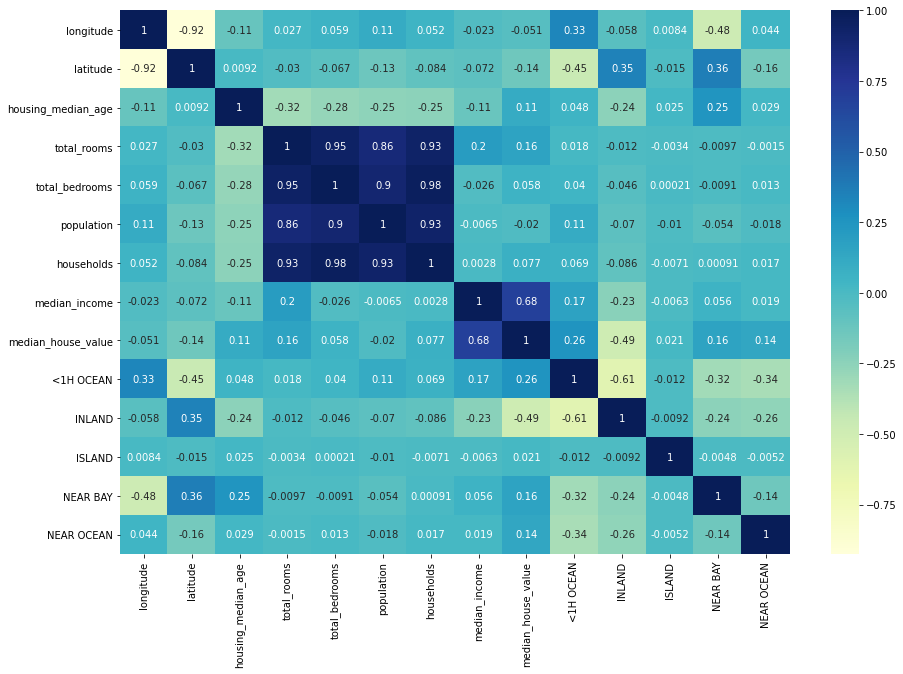

In [24]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(train_data.corr(),annot = True, cmap = 'YlGnBu')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

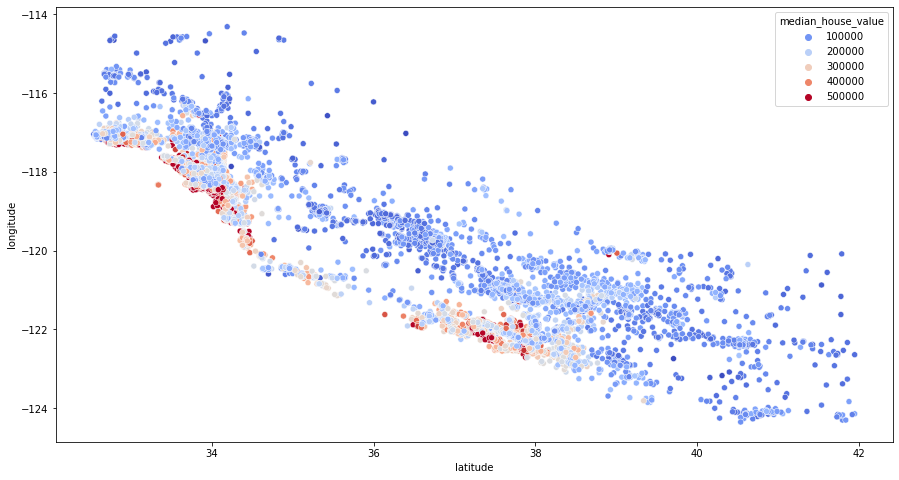

In [25]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x = 'latitude', y='longitude', data = train_data, hue ='median_house_value', palette='coolwarm')

## This Plot shows that the price the the houses are more in the ocean side. 

- <font color=red>Red Mark => Higher Median House Values </font>


In [26]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<AxesSubplot:>

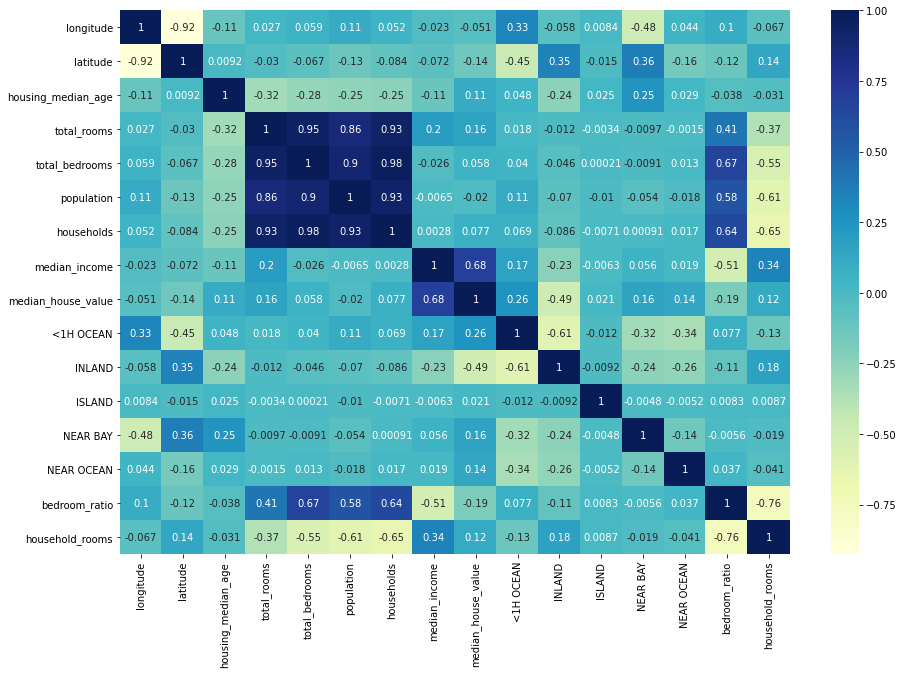

In [27]:
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(train_data.corr(),annot = True, cmap = 'YlGnBu')

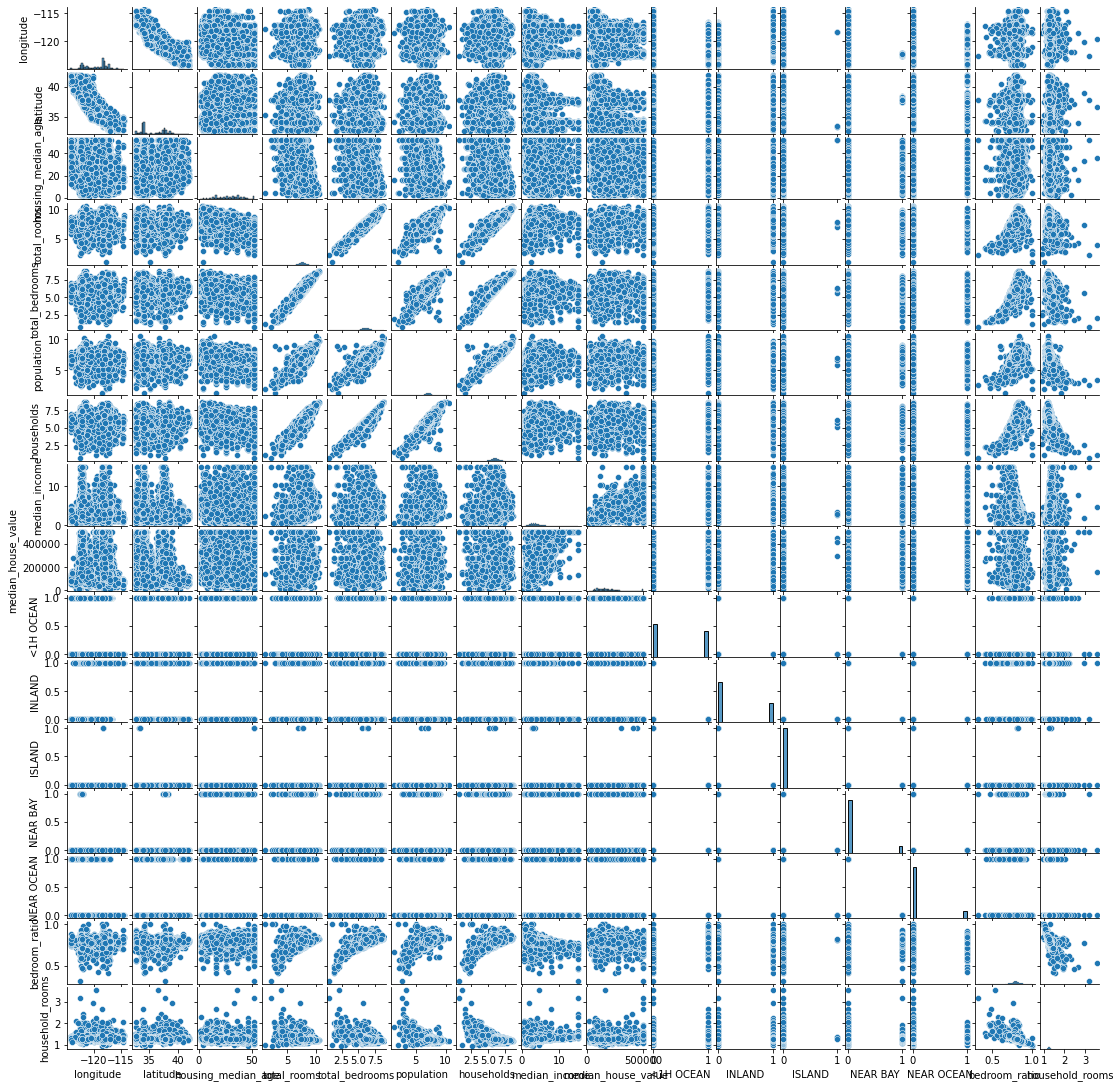

In [40]:
sns. pairplot(train_data).fig.set_size_inches(15,15)

In [28]:
from sklearn.linear_model import LinearRegression
X_train, y_train = train_data.drop(['median_house_value'], axis = 1), train_data['median_house_value']

In [29]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [30]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']
X_test, y_test = test_data.drop(['median_house_value'], axis = 1), test_data['median_house_value']

In [31]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
6715,-118.18,34.14,38.0,8.019613,6.190315,7.031741,6.144186,7.7116,360900.0,1,0,0,0,0,0.771897,1.305236
4121,-118.19,34.14,38.0,7.510431,5.707110,6.677083,5.697093,5.2962,291500.0,1,0,0,0,0,0.759891,1.318292
15433,-117.25,33.20,10.0,7.626083,6.161207,7.172425,6.156979,2.7961,131300.0,1,0,0,0,0,0.807912,1.238608
20272,-119.23,34.19,16.0,8.575085,6.698268,7.306531,6.504288,6.4522,500001.0,0,0,0,0,1,0.781131,1.318374
11843,-120.93,39.96,15.0,7.418781,5.863631,6.705639,5.758902,2.9559,118800.0,0,1,0,0,0,0.790377,1.288228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,-118.08,34.16,42.0,8.157944,6.501290,7.446585,6.431331,4.5461,242400.0,0,1,0,0,0,0.796928,1.268469
9862,-121.85,36.60,21.0,7.775696,6.553933,7.142827,6.492240,2.5372,218000.0,1,0,0,0,0,0.842874,1.197691
9456,-123.71,39.88,42.0,7.325808,5.950643,6.487684,5.717028,1.4952,69800.0,0,0,0,0,1,0.812285,1.281401
17145,-122.18,37.44,44.0,7.713338,5.852202,6.855409,5.849325,8.2436,500001.0,0,0,0,0,1,0.758712,1.318672


In [32]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
489,-122.25,37.86,48.0,7.675082,6.249975,7.412764,6.131226,3.0417,489600.0,0,0,0,1,0,0.814320,1.251802
2117,-119.73,36.76,30.0,7.345365,5.645447,6.787845,5.743003,3.1000,71300.0,0,1,0,0,0,0.768573,1.279011
18861,-122.19,38.13,5.0,8.968906,7.277248,8.380686,7.241366,4.9504,214800.0,0,0,0,1,0,0.811386,1.238565
6855,-118.15,34.06,28.0,8.257386,6.827629,7.831220,6.774224,3.5050,204300.0,1,0,0,0,0,0.826851,1.218942
5321,-118.43,34.05,52.0,7.434848,5.673323,6.590301,5.723585,6.7115,500001.0,1,0,0,0,0,0.763072,1.298984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,7.303170,5.690359,6.834109,5.690359,5.1418,190300.0,1,0,0,0,0,0.779163,1.283429
17455,-120.43,34.70,26.0,7.763871,5.966147,7.259116,5.966147,3.8700,125800.0,0,0,0,0,1,0.768450,1.301321
5249,-118.45,34.08,52.0,7.313887,5.176150,5.953243,4.983607,7.1576,500001.0,1,0,0,0,0,0.707715,1.467589
12290,-116.97,33.94,29.0,8.070281,6.450470,7.451822,6.403574,3.0432,91200.0,0,1,0,0,0,0.799287,1.260278


In [33]:
lm.score(X_test,y_test)

0.6794071835586115

In [34]:
predictions = lm.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 47350.52995240449
MSE: 4262878767.190393
RMSE: 65290.72497062958


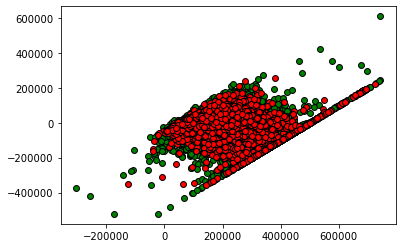

In [35]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = "green", s = 35, edgecolor='black', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = "red", s = 35, edgecolor='black', label = 'Test data')

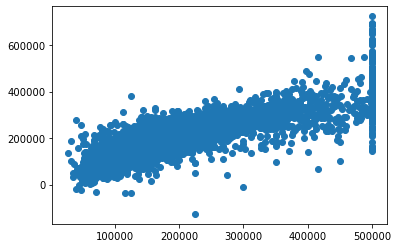

In [38]:
plt.scatter(y_test,predictions)